# Linear Regression

This Jupyter Notebook is dedicated to understanding and implementing the linear regression algorithm on a single neuron for soccer data. You can find the dataset [2022-2023 Soccer Player Stats Dataset](https://www.kaggle.com/datasets/vivovinco/20222023-football-player-stats?resource=download).

The following packages are required to run the attached code:

- [Math](https://docs.python.org/3/library/math.html)

- [Matplotlib.pylab](https://matplotlib.org/2.0.2/api/pyplot_api.html)

- [Numpy](https://numpy.org/doc/)

- [Seaborn](https://seaborn.pydata.org/)

- [Pandas](https://pandas.pydata.org/docs/)

- [SciKit Learn](https://scikit-learn.org/stable/)

## Description of the Algorithm:

***
Continuing on with supervised machine learning, in this notebook, I will implement a single neuron regression model (simple linear regression for simplicity) using gradient descent. 

While the perceptron algorithm performed binary classification, linear regression will train a function to establish a (linear) functional relationship between a set of predictor variables and a response variable. 

Here is the difference between regression and classification: 

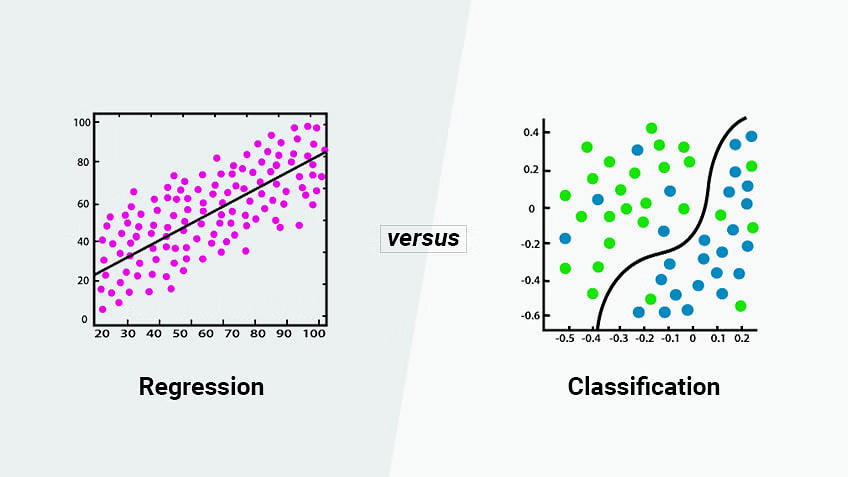

In regression, we take a predictor data, $D = (x_1 , y_1), ... , (x_n , y_n)$, where $x_i$ represents a vector of predictor data and $y_i$ represents the true response. If there is some "true" or "optimal" target function, our goal is to create a model that reflects this function by training it using the given data. 

Our goal is to accurately predict the response variables given the predictor variables, estimating the true target function in the process. 

In this case, we will use linear regression, so we are assuming that the "true" target function is linear -- that there is a linear relationship between the predictors and the response.

Image source [SimpliLearn](https://www.simplilearn.com/regression-vs-classification-in-machine-learning-article).
***

## Understanding the Algorithm:

***
Like before, we are trying to approximate an optimal, or true, target function that represents the true spread of the data. 

We can see the linear regression neural model here: 

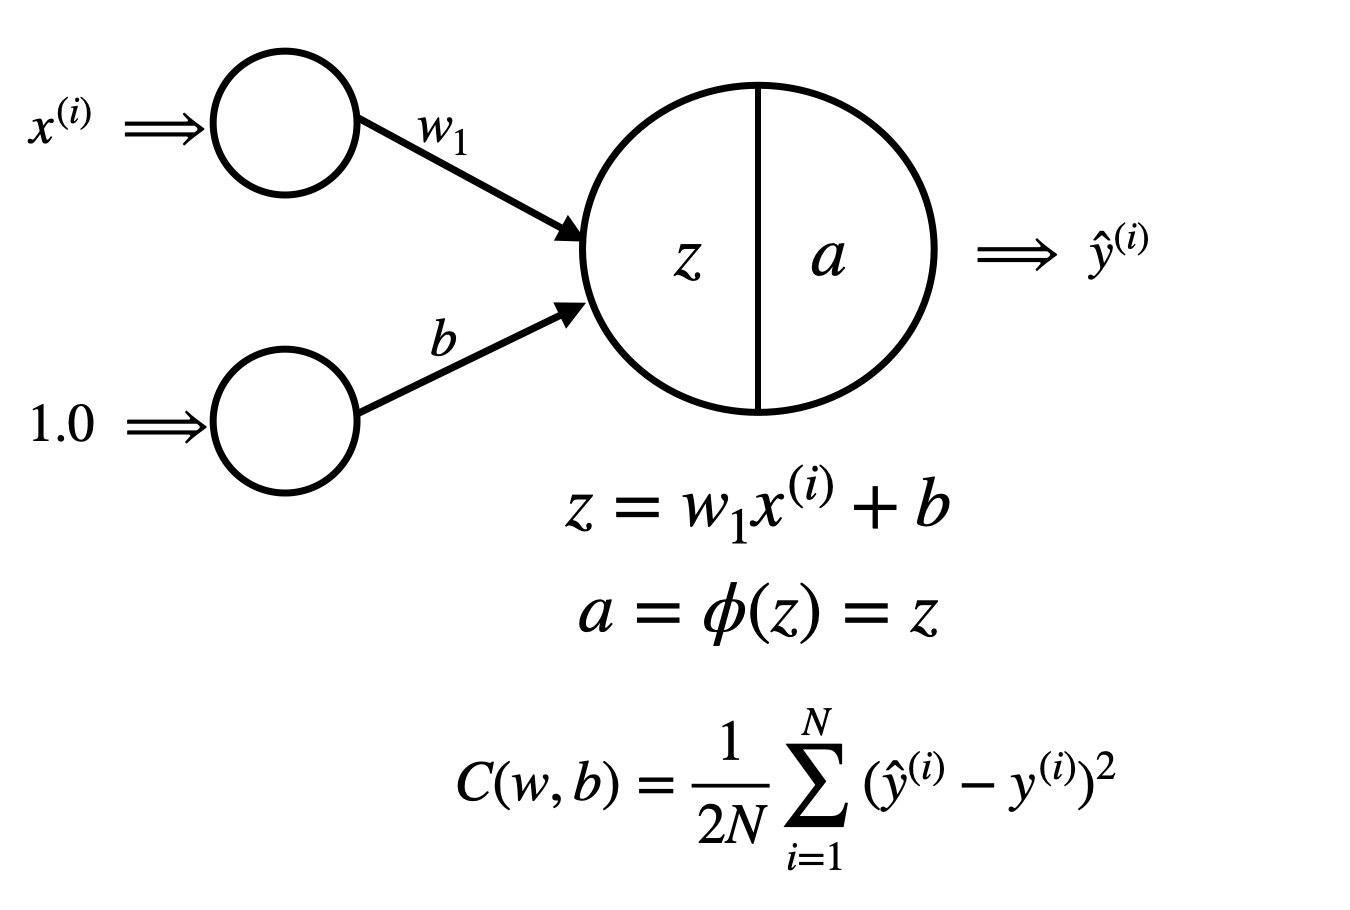

For regression, we still see a lot of the neuron elements we saw previously, but somethings are different too. 

We now have a cost function, written above as  $C(\mathbf{w}, b) = \frac{1}{2N}\sum_{i=1}^{N}\Big(\hat{y}^{(i)} - y^{(i)}\Big)^2$ is a way of measuring how good our model predictions are. 

To get the best model, we want to minimize this cost function using our favorite gradient descent algorithm!

To do this, though, we need to take the partial derivatives associated with the bias and weights, getting us the OLS estimators. 

This leaves us to update the bias and weights as such:

$b \leftarrow b - \alpha \frac{\partial C(w_1, b; \mathbf{x}^{(i)}, y^{(i)})}{\partial b}$

$ w \leftarrow w - \alpha \frac{\partial C(w_1, b; \mathbf{x}^{(i)}, y^{(i)})}{\partial w_1}$

Where alpha is the learning rate!

Image source [Class Lecture 4.2](https://www.youtube.com/watch?app=desktop&v=4gAWDhVzkHc).
***

## Setting Up:

***
Import the necessary modules.
***

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

***
Read in the data. We will be using shots as the predictor and goals as the response.
***

In [3]:
#Import the dataset. 
soccer = pd.read_csv("/Users/pstern/Desktop/INDE-577/Datasets/soccer_stats.csv", encoding='ISO-8859-1', delimiter=';')

# Filter the data such that we are only including players who have player more than 15 games worth of time.
soccer = soccer[soccer['90s'] >= 15.0]

# Just use the first 250 data points.
data = soccer[:250]

# Selects shots as our predictor.
predictors = data[['Shots']]

# Now do the same for the goals.
y = data[['Goals']]

# Convert each to a numpy array.
y = y.values
x = predictors.values


***
Let's standardize the data based on the number of games played to get better predictions.
***

In [4]:
# Get the number of 90s played.
ninetys = data['90s'].values

# Multiply each row by the number of 90s played to normalize.
for i in range(x.shape[1]):
    if ninetys[i] != 0:
        x[:, i] = x[:, i] * ninetys[i]

***
Let's get test and training data, so we can see our results on data we didn't directly train on. 
***

In [5]:
# Split the data into training and testing sets.
train_p, test_p, train_r, test_r = train_test_split(x, y, test_size = 0.4, random_state = 42)

***
Let's plot this to check if it is approximately linear. 
***

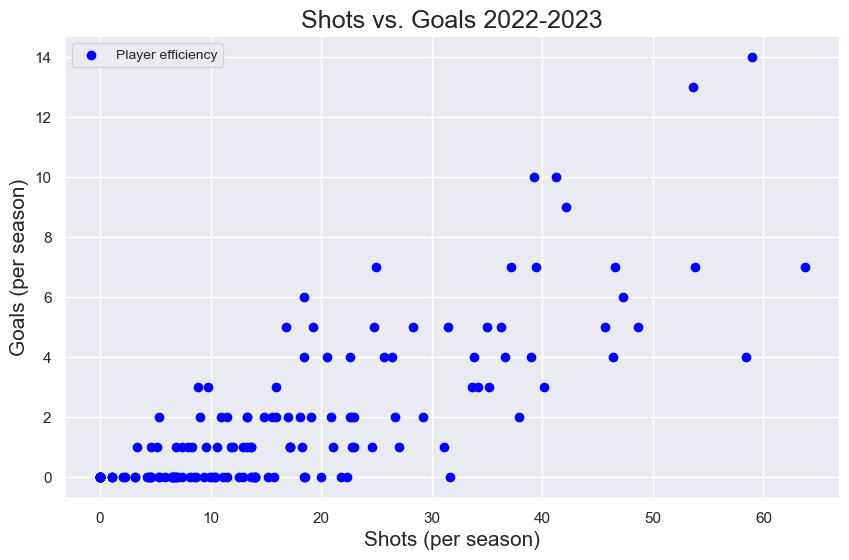

In [6]:
# Set the theme. 
sns.set_theme()

# Plot the data. 
plt.figure(figsize = (10, 6))
plt.scatter(train_p, train_r, color = "blue", label = "Player efficiency")
plt.xlabel("Shots (per season)", fontsize = 15)
plt.ylabel("Goals (per season)", fontsize = 15)
plt.title("Shots vs. Goals 2022-2023", fontsize = 18)
plt.legend(fontsize = 10)
plt.show()

There seems to be a general linear correlation although there seems to be more variance in the data as x increases. 

***
Implement the Single Neuron Regression Model.
***

In [7]:
# Create a class that a single linear regression neuron.
class SingleNeuron(object):
    '''
        Class Attributes:

        activation_function : function
        The activation function applied in the preactivation stage. 

        w_ : numpy.ndarray
            The weights and bias of the single neuron.
            
        errors_: list
            A list containing the mean sqaured error computed after each epoch.
    '''
    # Initialize the class object. 
    def __init__(self, activation_function):
            self.activation_function = activation_function

    # Train the model.
    def train(self, x, y, alpha = 0.005, epochs = 50):
        '''
        Trains the regression model using the provided feature vectors X and associated labels y.
        '''
        self.w_ = np.random.rand(1 + x.shape[1])
        self.errors_ = []
        N = x.shape[0]

        # Loop through the epochs.
        for _ in range(epochs):
            errors = 0
            # Keep track of the errors for each epoch.
            for xi, target in zip(x, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                errors += .5*(error**2)
            self.errors_.append(errors/N)
        return self

    # Predict the output.
    def predict(self, x):
        '''
        Predicts the class labels for the input feature vectors X after training.
        '''
        preactivation = np.dot(x, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)
    

# Define the activation function.
def linear_activation(z):
    return z

node = SingleNeuron(linear_activation)
node.train(train_p, train_r, alpha = 0.0001, epochs = 50)


***
Plot the regression.
***

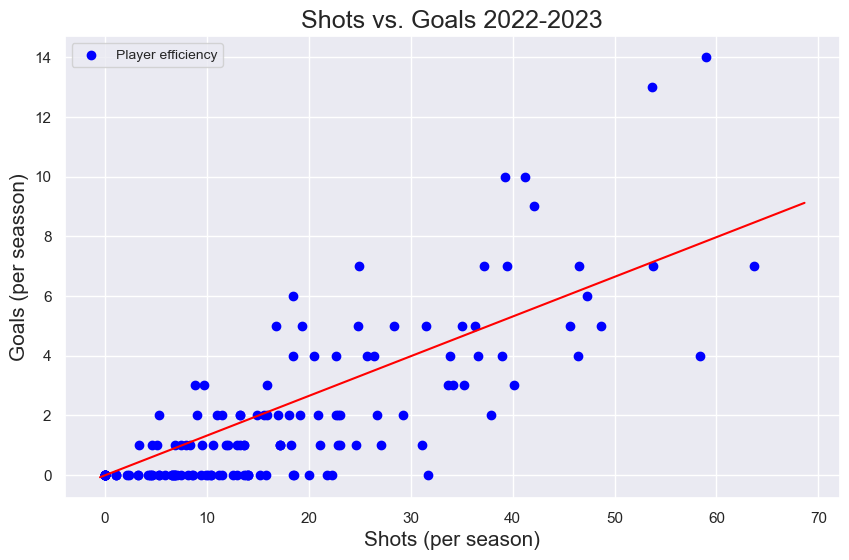

Mean Squared Error:  [1.50811377]


In [8]:
# Set the domain.
domain = np.linspace(np.min(x) - .5, np.max(x) + .5, 100)

# Plot the data.
plt.figure(figsize = (10, 6))
plt.scatter(train_p, train_r, color = "blue", label = "Player efficiency")

# Plot the model.
plt.plot(domain, node.predict(domain.reshape(-1, 1)), color = 'red')

# Add labels and the legend.
plt.xlabel("Shots (per season)", fontsize = 15)
plt.ylabel("Goals (per seasson)", fontsize = 15)
plt.title("Shots vs. Goals 2022-2023", fontsize = 18)
plt.legend(fontsize = 10)
plt.show()

# Print the mean-squared error.
print("Mean Squared Error: ", node.errors_[-1])

***
Let's look at how the model improves as we increase the epochs.
***

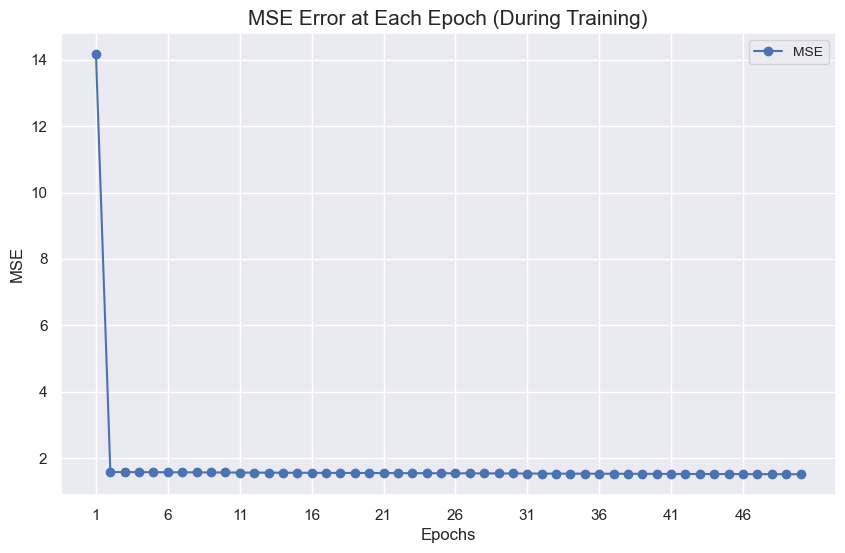

In [9]:
# Plot the data.
plt.figure(figsize = (10, 6))
plt.plot(range(1, len(node.errors_) + 1), node.errors_, marker = "o", label = "MSE")

# Add labels and the legend.
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("MSE Error at Each Epoch (During Training)", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1, 5))
plt.legend(fontsize = 10)
plt.show()

It's interesting how this decreases rapidly after the first epoch and then very slowly after each remaining iteration. 

***
Let's look at the impact of changing the learning rate. 
***

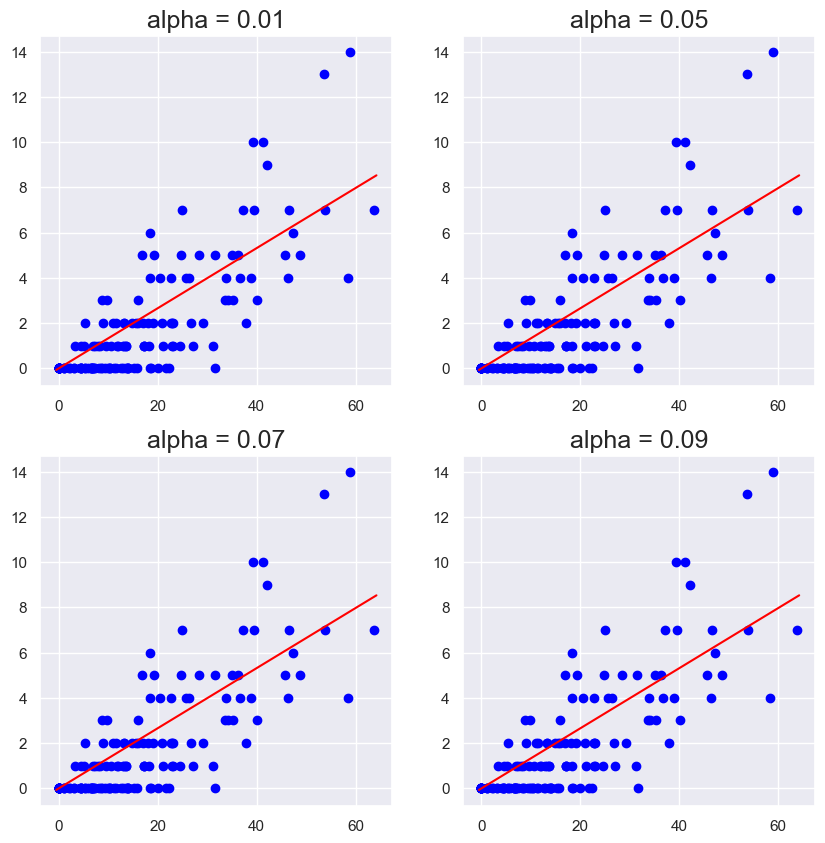

In [10]:
# Choose possible learning rates.
alphas = [0.01, 0.05, 0.07, 0.09]

# Set the domain.
domain = np.linspace(np.min(train_p) - .5, np.max(train_p) + .5, 100)

# Call the subplots method for plotting a grid of figures.
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    ax.plot(domain, node.predict(domain.reshape(-1, 1)), color = 'red')
    ax.scatter(train_p, train_r, color = "blue")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)

## Testing on New Data: Is overfitting an issue?

***
**Why is it important?**

- Testing on new data allows us to evaluate how well our linear regression model generalizes to unseen instances. 

- Testing on new data helps detect overfitting, where the model learns the training data too well and fails to generalize to new data. Overfitting can occur when the model captures noise in the training data, leading to poor performance on unseen data. 

- Testing on new data provides an unbiased estimate of the model's performance. By comparing the model's predictions on new data with the true target values, we can assess its predictive accuracy and identify any shortcomings or areas for improvement.
***

***
Replot the data and compare the mean-squared errors.
***

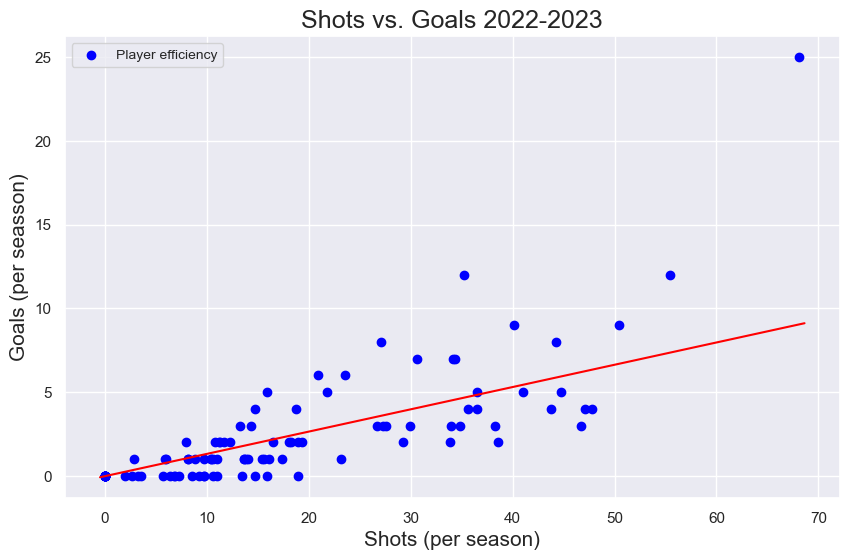

Mean Squared Error:  [5.39102155]


In [11]:
# Set the domain.
domain = np.linspace(np.min(x) - .5, np.max(x) + .5, 100)

# Plot the data.
plt.figure(figsize = (10, 6))
plt.scatter(test_p, test_r, color = "blue", label = "Player efficiency")

# Plot the model.
plt.plot(domain, node.predict(domain.reshape(-1, 1)), color = 'red')

# Add labels and the legend.
plt.xlabel("Shots (per season)", fontsize = 15)
plt.ylabel("Goals (per seasson)", fontsize = 15)
plt.title("Shots vs. Goals 2022-2023", fontsize = 18)
plt.legend(fontsize = 10)
plt.show()

# Calculate the mean-squared error.
mse = 0 
for i in range(len(test_p)-1):
    prediction = node.predict(test_p[i])
    actual = test_r[i]
    mse += (prediction - actual)**2

print("Mean Squared Error: ", mse/len(test_p))


The model does much worse on new data. This may be because of the huge outlier in Erling Haaland (too many goals!). This is why it's important not just to look at one metric, because despite the higher MSE, this still seems like a good model. 

***
Let's try this again, but this time lets train on a fewer and greater number of epochs to see the difference.
***

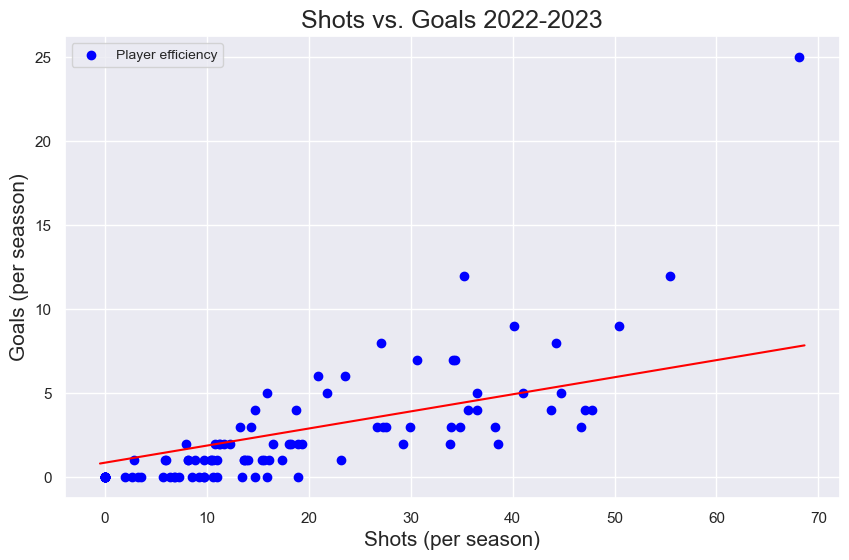

Mean Squared Error:  [6.3211736]


In [12]:
# Fewer Epochs.
node.train(train_p, train_r, alpha = 0.0001, epochs = 5)

# Set the domain.
domain = np.linspace(np.min(x) - .5, np.max(x) + .5, 100)

# Plot the data.
plt.figure(figsize = (10, 6))
plt.scatter(test_p, test_r, color = "blue", label = "Player efficiency")

# Plot the model.
plt.plot(domain, node.predict(domain.reshape(-1, 1)), color = 'red')

# Add labels and the legend.
plt.xlabel("Shots (per season)", fontsize = 15)
plt.ylabel("Goals (per seasson)", fontsize = 15)
plt.title("Shots vs. Goals 2022-2023", fontsize = 18)
plt.legend(fontsize = 10)
plt.show()

# Calculate the mean-squared error.
mse = 0 
for i in range(len(test_p)-1):
    prediction = node.predict(test_p[i])
    actual = test_r[i]
    mse += (prediction - actual)**2

print("Mean Squared Error: ", mse/len(test_p))

Fewer epochs does worse!

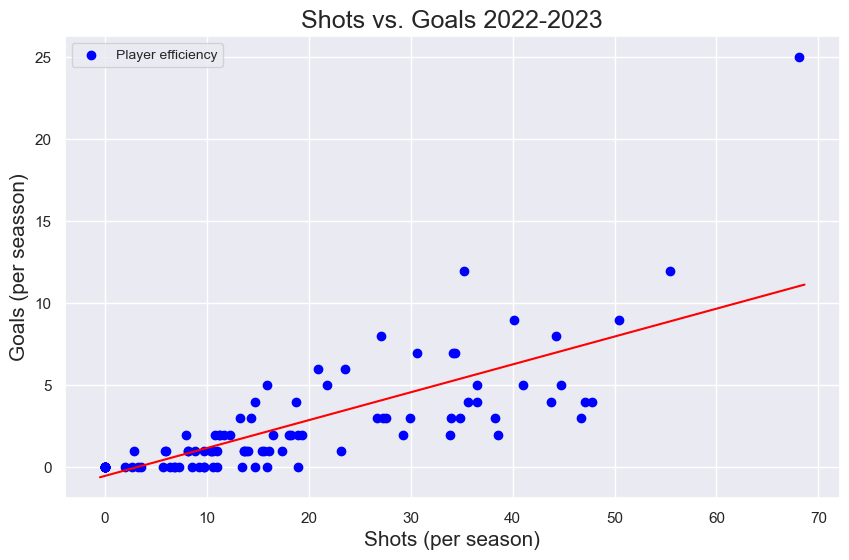

Mean Squared Error:  [4.93902595]


In [13]:
# More epochs. 
node.train(x, y, alpha = 0.0001, epochs = 200)

# Set the domain.
domain = np.linspace(np.min(x) - .5, np.max(x) + .5, 100)

# Plot the data.
plt.figure(figsize = (10, 6))
plt.scatter(test_p, test_r, color = "blue", label = "Player efficiency")

# Plot the model.
plt.plot(domain, node.predict(domain.reshape(-1, 1)), color = 'red')

# Add labels and the legend.
plt.xlabel("Shots (per season)", fontsize = 15)
plt.ylabel("Goals (per seasson)", fontsize = 15)
plt.title("Shots vs. Goals 2022-2023", fontsize = 18)
plt.legend(fontsize = 10)
plt.show()

# Calculate the mean-squared error.
mse = 0 
for i in range(len(test_p)-1):
    prediction = node.predict(test_p[i])
    actual = test_r[i]
    mse += (prediction - actual)**2

print("Mean Squared Error: ", mse/len(test_p))

As we increase the epochs, it seems to do better!

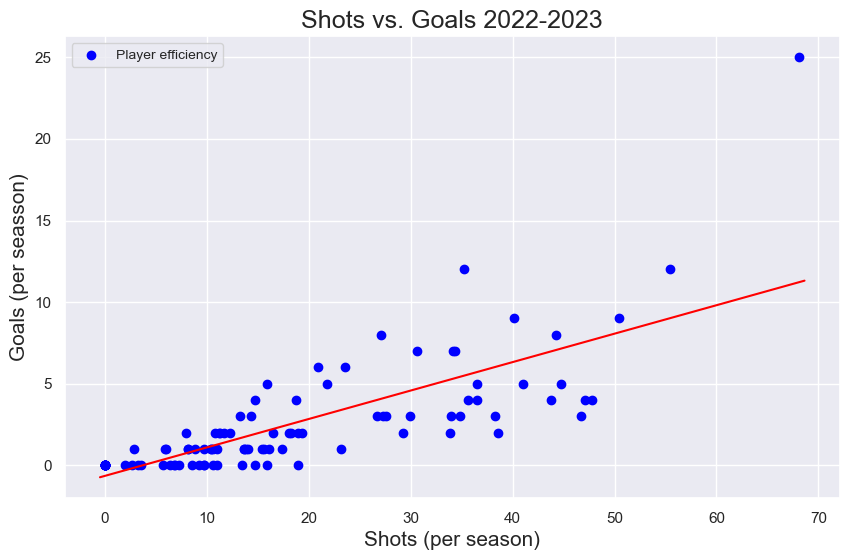

Mean Squared Error:  [4.91621509]


In [14]:
node.train(x, y, alpha = 0.0001, epochs = 1000)

# Set the domain.
domain = np.linspace(np.min(x) - .5, np.max(x) + .5, 100)

# Plot the data.
plt.figure(figsize = (10, 6))
plt.scatter(test_p, test_r, color = "blue", label = "Player efficiency")

# Plot the model.
plt.plot(domain, node.predict(domain.reshape(-1, 1)), color = 'red')

# Add labels and the legend.
plt.xlabel("Shots (per season)", fontsize = 15)
plt.ylabel("Goals (per seasson)", fontsize = 15)
plt.title("Shots vs. Goals 2022-2023", fontsize = 18)
plt.legend(fontsize = 10)
plt.show()

# Calculate the mean-squared error.
mse = 0 
for i in range(len(test_p)-1):
    prediction = node.predict(test_p[i])
    actual = test_r[i]
    mse += (prediction - actual)**2

print("Mean Squared Error: ", mse/len(test_p))

The trend continues -- even though it's at a slower rate for now more epochs means better models!

***
This model seems resistent to overfitting (to a point). As I increased the number of epochs, the MSE continued to improve (although increasingly more slowly) as the number of epochs grew.
***

## Conclusions:

***
In this Jupyter Notebook, we explored the concept of linear regression and its application in predicting player efficiency in soccer based on shots per season. Here are the key conclusions from our analysis:

1. Model Evaluation: Analyzing our models is essentual to understanding if our models are good or just overfit. For example, the Erling Haaland outlier significantly lowers our MSE on test data, but it seems like our model is pretty good, we just got unlucky with the selected test data. 

2. Impact of Learning Rate: We experimented with different learning rates to observe their impact on the model's performance. Higher learning rates resulted in faster convergence but also increased the risk of overshooting the optimal solution.

3. Overfitting: We observed that the model performed well on the training data but struggled to generalize to new data. This discrepancy may be attributed to outliers or noise in the dataset. It is important to consider multiple evaluation metrics and not rely solely on MSE to assess model performance.

4. Epochs and Model Performance: Increasing the number of epochs improved the model's performance up to a certain point. After a certain threshold, the improvement in MSE became marginal, indicating diminishing returns, especially with the risk of overfitting.

Linear regression is a great regression model to add to our toolkit, I am interested to see how linear regression compares to the models we use in the future. 
***
